In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

# <div align="center"> Séance 1 : Calcul numérique</div>
   
Durant ce travail, nous allons aborder deux calculs numériques importants : le calcul d'une intégrale, et le calcul d'une racine carré. Le but est de ré-utiliser les connaissances préalablement acquises (fonction, manipulation des listes, boucles, ...), de voir des algorithmes utiles, de parler de leur convergence, et d'entrevoir la récursivité.

# Calculs d'intégrale

On considère une fonction $f$ d'une seule variable $x$, dont on veut calculer l'intégrale entre les bornes $a$ et $b$ (ces deux bornes sont incluses dans l'intervalle de définition de la fonction, il ne s'agit pas d'une intégrale impropre !) :
$$I =\int_a^b f(x)\, \mathrm{d} x$$

Cette valeur est evidemment interessante pour des intégrales que nous ne sommes pas capables de calculer théoriquement, mais aussi par exemple pour calculer des valeurs moyennes de fonction :
$$ <f> = \frac{1}{b-a} \int_a^b f(x)\, \mathrm{d} x$$

## Méthode des rectangles

Il s'agit de la méthode la plus simple pour déterminer la valeur numérique d'une intégrale. Dans cette méthode, on divise l'intervalle $[a,b]$ en $n$ sous-intervalles.

![schema1](im/axe_d.png)

Chacun de ces sous-intervalles a pour longueur $h = \frac{b-a}{n}$, nommé **pas** de discrétisation. Les valeurs de $x$ sont discrétisées, avec les $n+1$ valeurs suivante : $x_0 =a$, $x_1$, $x_2$, ...,$x_{n-1}$,$x_n = b$. L'entier $i$ est l'index des positions. Pour mieux comprendre cette discretisation, on peut prendre l'exemple suivant : dans un ascenseur, pour déterminer la position finale qu'on veut atteindre, on utilise le numéro de l'étage, il s'agit de l'index. On n'indique pas, par exemple, l'altitude exact de l'étage !

Dans la suite, nous allons remplacer la fonction $f$ par des valeurs prises par cette même fonction, en certains points seulement : nous remplaçons bien une fonction continue par des valeurs discretes (cela revient à passer d'une fonction à une suite).  

L'intégrale s'écrit, en utilisant les sous-intervalles :
$$I =\int_{a}^{b} f(x)\, \mathrm{d} x = \int_{x_0}^{x_1} f(x)\, \mathrm{d} x + \int_{x_1}^{x_2} f(x)\, \mathrm{d} x +\ ...\ + \int_{x_{n-1}}^{x_n} f(x)\, \mathrm{d} x$$
On remplace alors, sur chaque sous-intervalle, la fonction $f$ par une constante. Pour cela, on utilise  une valeur prise par la fonction sur l'intervalle considérée. Trois choix sont proposés pour déterminer cette valeur, sur l'intervalle $[x_i , x_{i+1} ]$. On pourra se contenter de la première...

**Méthode des rectangles à gauche :** On peut prendre la valeur de la fonction $f$ au début de cet intervalle : $f(x_i)$. L'intégrale sur ce sous-intervalle s'écrit alors $\int_{x_i}^{x_{i+1}} f(x)\, \mathrm{d} x \simeq \int_{x_i}^{x_{i+1}} f(x_i)\, \mathrm{d} x = (x_{i+1}-x_{i})f(x_i) = h f(x_i)$. Cette valeur d'intégrale peut être vue comme l'aire d'un rectangle (voir figure plus loin), de largeur $h$ et de hauteur $f(x_{i})$.

**Méthode des rectangles à droite :** On peut prendre la valeur de la fonction $f$ à la fin de cet intervalle : $f(x_{i+1})$. L'intégrale sur ce sous-intervalle s'écrit alors $\int_{x_i}^{x_{i+1}} f(x)\, \mathrm{d} x \simeq \int_{x_i}^{x_{i+1}} f(x_{i+1})\, \mathrm{d} x = (x_{i+1}-x_{i})f(x_{i+1}) = h f(x_{i+1})$. Cette valeur d'intégrale peut être vue comme l'aire d'un rectangle (voir figure plus loin), de largeur $h$ et de hauteur $f(x_{i+1})$.

**Méthode des rectangles au milieu :** On peut prendre la valeur de la fonction $f$ au milieu de cet intervalle : $f\left(\frac{x_i + x_{i+1}}{2}\right)$. L'intégrale sur ce sous-intervalle s'écrit alors $\int_{x_i}^{x_{i+1}} f(x)\, \mathrm{d} x \simeq \int_{x_i}^{x_{i+1}} f\left(\frac{x_i + x_{i+1}}{2}\right)\, \mathrm{d} x = (x_{i+1}-x_{i})f\left(\frac{x_i + x_{i+1}}{2}\right) = h f\left(\frac{x_i + x_{i+1}}{2}\right)$. Cette valeur d'intégrale peut être vue comme l'aire d'un rectangle (voir figure plus loin), de largeur $h$ et de hauteur $f\left(\frac{x_i + x_{i+1}}{2}\right)$.

![schema1](im/3_rec.png)

Pour obtenir la valeur numérique de l'intégrale sur tout l'intervalle $I$, il reste à faire la somme, écrite ici pour la méthode des rectangles à gauche :
$$ I =\int_{a}^{b} f(x)\, \mathrm{d} x \approx \sum_{i=0}^{n-1} h f(x_i)$$
Ou plus précisement, en écrivant que $x_i = x_0 + ih = a + ih$:
$$ I =\int_{a}^{b} f(x)\, \mathrm{d} x \approx h\sum_{i=0}^{n-1} f\left(a + ih\right) =  \frac{b-a}{n} \sum_{i=0}^{n-1} f\left(a + i \frac{b-a}{n}\right)$$

Graphiquement, voici les deux premières méthodes pour une fonction, ainsi que la même méthode (à droite) en variant le nombre de rectangles :

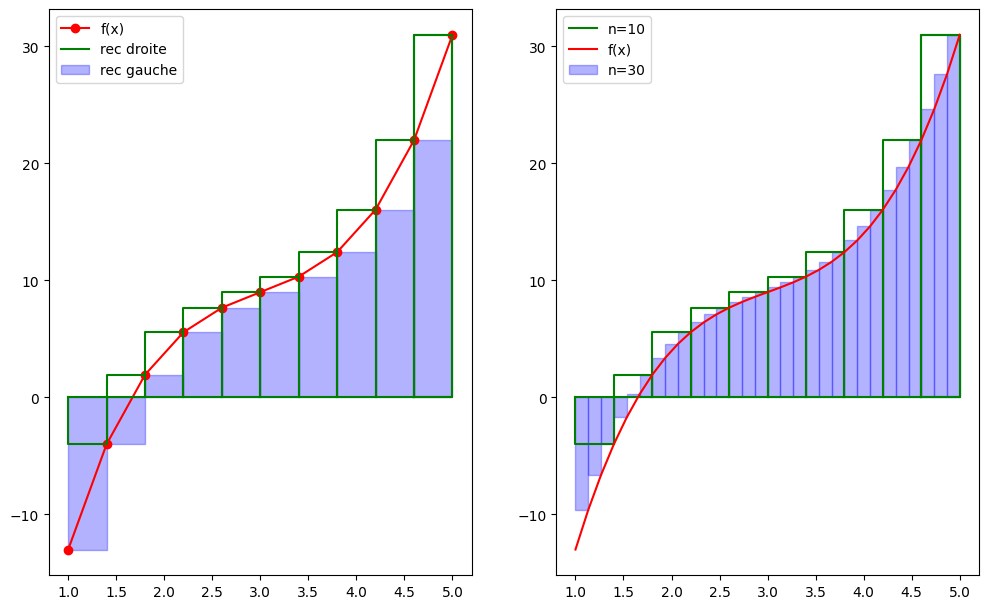

In [8]:
a = 1
b = 5
n = 10
x = np.linspace(a, b, n+1)
y = 2*(x-3)**3 +3*x

ratio, dpi =  1.5, 100
plt.figure(figsize=(8*ratio,5*ratio),dpi = dpi)

plt.subplot(121)
plt.plot(x,y,"ro-", label = 'f(x)') # graphe de la fonction
for i in range(n-1): # graphe des sommets rectangles à gauche
    x_rect = [x[i], x[i+1]] # abscisses des sommets
    y_rect = [ y[i], y[i]] # ordonnees des sommets
    plt.fill_between(x_rect, y_rect, color='blue', alpha=0.3)
x_rect = [x[n-1], x[n]] # abscisses des sommets
y_rect = [ y[n-1], y[n-1]] # ordonnees des sommets
plt.fill_between(x_rect, y_rect, color='blue', alpha=0.3,label='rec gauche')
for i in range(n): # graphe des rectangles à droite
    x_rect = [x[i], x[i], x[i+1], x[i+1], x[i]] # abscisses des sommets
    y_rect = [0   , y[i+1], y[i+1]  , 0     , 0   ] # ordonnees des sommets
    plt.plot(x_rect, y_rect,"g")
plt.plot(x_rect, y_rect,"g", label='rec droite')
plt.legend()

plt.subplot(122)
for i in range(n): # graphe des rectangles à droite
    x_rect = [x[i], x[i], x[i+1], x[i+1], x[i]] # abscisses des sommets
    y_rect = [0   , y[i+1], y[i+1]  , 0     , 0   ] # ordonnees des sommets
    plt.plot(x_rect, y_rect,"g")
plt.plot(x_rect, y_rect,"g", label='n=10')

n = 31
x = np.linspace(a, b, n)
y = 2*(x-3)**3 +3*x
plt.plot(x,y,'r',label = 'f(x)') # graphe de la fonction

for i in range(n-2): # graphe des sommets rectangles à droite
    x_rect = [x[i], x[i+1]] # abscisses des sommets
    y_rect = [ y[i+1], y[i+1]] # ordonnees des sommets
    plt.fill_between(x_rect, y_rect, color='blue', alpha=0.3)
x_rect = [x[n-2], x[n-1]] # abscisses des sommets
y_rect = [ y[n-1], y[n-1]] # ordonnees des sommets
plt.fill_between(x_rect, y_rect, color='blue', alpha=0.3,label='n=30')
plt.legend()
plt.show()

Graphiquement, on comprend aisément que plus $n$ est grand, plus $h$ est petit, et la méthode est précise. Elle devient exacte dans la limite $n \to \infty$, soit $h \to 0$ :
$$ I =\int_{a}^{b} f(x)\, \mathrm{d} x = \lim\limits_{n \to \infty} \frac{b-a}{n} \sum_{i=0}^{n-1} f\left(a + i \frac{b-a}{n}\right )$$

On retrouve alors que l'aire sous la courbe (comptée algébriquement), soit la somme des aires des rectangles, est aussi la valeur de l'intégrale.

**Question 1 :** Ecrire la fonction `int_rec(f,a,b,n)` permettant de donner la valeur numérique de l'intégrale de la fonction $f(x)$ entre les bornes $a$ et $b$, en utilisant la méthode des rectangles de votre choix, avec $n$ rectangles.

**Question 2 :** Prendre un exemple de fonction dont vous êtes capables de donner l'intégrale, et tester votre code. On ne prendra pas une fonction trop simple .... (la méthode des rectangles "milieux" donne d'ailleurs un résultat exacte pour une fonction affine !). Représenter, sur un graphe, la convergence du résultat de votre méthode des rectangles : on représentera la valeur retournée en fonction du nombre de rectangles $n$.

## Méthode des trapèzes
La méthode des trapèzes est similaire à celle des rectangles, mais dans cette méthode, on approxime la fonction $f$ sur l'intervalle de $x_i$ à $x_{i+1}$ par une fonction affine (au lieu d'une fonction constante). La fonction affine étant la *meilleure* approximation de la fonction est celle passant par les poinnts $(x_i,f(x_i))$ et $(x_{i+1},f(x_{i+1}))$ :
![schema1](im/trap.png)

Pour l'intégrale totale :

In [ ]:
a = 1
b = 5
n = 6
x = np.linspace(a, b, n+1)
y = 2*(x-3)**3 +3*x

ratio, dpi =  1.5, 100
plt.figure(figsize=(8*ratio,5*ratio),dpi = dpi)

plt.plot(x,y,"ro") # graphe de la fonction aux points discrétisés
for i in range(n-1): # graphe des sommets des trapèzes
    x_rect = [x[i], x[i+1]] # abscisses des sommets
    y_rect = [ y[i], y[i+1]] # ordonnees des sommets
    plt.fill_between(x_rect, y_rect, color='orange', alpha=0.3)
x_rect = [x[n-1], x[n]] # abscisses des sommets
y_rect = [ y[n-1], y[n]] # ordonnees des sommets

n = 100
x = np.linspace(a, b, n+1)
y = 2*(x-3)**3 +3*x
plt.plot(x,y,label = 'f(x)') # graphe de la fonction aux point

plt.fill_between(x_rect, y_rect, color='orange', alpha=0.3,label='trapèzes')
plt.legend()

*Remarque :* La méthode des trapèzes peut aussi être vu comme la méthode des rectangles, mais avec un rectangle de hauteur la moyenne des hauteurs gauche et droite : $\frac{f\left(x_i\right)+f\left(x_{i+1}\right)}{2}$. A ne pas confondre avec la méthode des rectangles mileu, pour laquelle la hauteur des rectangles est la valeur prise par la fonction à la moyenne des abscisses : $f\left(\frac{x_i+x_{i+1}}{2}\right)$. En général, les résultats sont en rélité peu différentes...avec un avantage pour la méthode des trapèzes !

**Queston 3 :** Ecrire la fonction `int_trap(f,a,b,n)` permettant de donner la valeur numérique de l'intégrale de la fonction $f(x)$ entre les bornes $a$ et $b$, en utilisant la méthode des trapèzes, avec $n$ trapèzes.

# Calculs de racine carrées : méthode de Héron

## De Héron à aujourd'hui : un peu d'histoire et de la géométrie...

Le calcul numérique de la racine carré d'un nombre est aussi un calcul loin d'être évident : pour trouver $\sqrt{x}$, on ne peut se permettre de rechercher *bêtement* le nombre qui, multiplié par lui-même, donne $x$. Il existe de nombreuses méthodes pour obtenir la valeur approchée de $\sqrt{x}$ de façon approchée. Nous allons étudier la méthode de Héron, découverte par Héron d'Alexandrie, au 1er siècle après J.C. (voir <url>https://fr.wikipedia.org/wiki/M%C3%A9thode_de_H%C3%A9ron</url>).

Cette méthode repose sur le constat géométrique simple suivant : pour connaître la racine carré du nombre $x$, il faut déterminer le côté du carré d'aire $x$. Partons alors d'un rectangle de côtés $1$ et $x$ : ainsi l'aire de ce rectangle est bien $x$. On déforme alors progressivement ce rectangle pour le transformer en carré, tout en conservant sa surface ! Il faut donc diminuer sa longueur, et augmenter sa largeur. Héron propose l'algorithme suivant : à chaque étape, on diminue la longeur, en prenant pour nouvelle longeur la valeur moyenne de l'ancienne largeur et de l'ancienne longueur. On augmente alors la largeur, en prenant pour ouvelle valeur la *bonne* valeur permettant de conserver une aire de $x$. Ainsi la longueur et la largeur vont tendre vers la même valeur, le côté du carré d'aire $x$ : il s'agit de $\sqrt{x}$.

![schema1](im/Heron.jpg)

Ci-dessus, les quatres premières itérations de l'algorithme, pour déterminer $\sqrt{2}$. On remarque que la convergence est rapide, le 4ème carré est déjà indiscernable du 3ème.

On peut montrer que cet algorithme est en réalité un cas particulier d'une méthode plus générale, la méthode de Newton. Il existe toujours aujourd'hui de la recherche afin d'optimiser les calculs numériques de ce type : on a, par exemple, recemment amélioré l'algorithme permettant à une machine de calculer le produit de 2 très grands nombres. De façon plus ludique, le jeu vidéo *Quake III*, sorti en 1999, est célèbre pour avoir, peut-être le premier, utilisé un nouvel algorithme pour le calcul de $\frac{1}{\sqrt{X}}$ : l'algorithme de Racine Carré Inverse Rapide (voir <url>https://fr.wikipedia.org/wiki/Racine_carr%C3%A9e_inverse_rapide</url>). Cette fonction est en effet très utile, un moteur de rendu 3d calcul a besoin de déterminer fréquemment des vecteurs unitaires pour *pointer* une direction, et donc de diviser par une racine carrée.

## Réalisation de la fonction python

**Question 4 :** Ecrire le code permettant d'encadrer la valeur de $\sqrt{x}$, grâce à la méthode de Héron. On utilisera un nombre, la précision, de telle sorte que l'agorithme s'arretera lorsque la longueur de l'intervalle est inférieure à cette précision. Tester le code, et observer la convergence.